In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Homework part I: Prohibited Comment Classification (3 points)

![img](https://github.com/yandexdataschool/nlp_course/raw/master/resources/banhammer.jpg)

__In this notebook__ you will build an algorithm that classifies social media comments into normal or toxic.
Like in many real-world cases, you only have a small (10^3) dataset of hand-labeled examples to work with. We'll tackle this problem using both classical nlp methods and embedding-based approach.

In [25]:
import pandas as pd
data = pd.read_csv("comments.tsv", sep='\t')

texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [26]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

### Preprocessing and tokenization

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

In [27]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


In [28]:
# task: preprocess each comment in train and test

# texts_train = <YOUR CODE>
# texts_test = <YOUR CODE>

texts_train = np.array([preprocess(text) for text in texts_train])
texts_test = np.array([preprocess(text) for text in texts_test])

In [29]:
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

### Solving it: bag of words

![img](http://www.novuslight.com/uploads/n/BagofWords.jpg)

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. Please don't do that in the current assignment, though.
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

In [30]:
# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurences (highest first)
k = 10000

# <YOUR CODE>
unique_words, counts_words = np.unique(' '.join(texts_train).split(), return_counts=True)

# bow_vocabulary = <YOUR CODE>
bow_vocabulary = unique_words[np.argsort(counts_words)[-k:]]

print('example features:', sorted(bow_vocabulary)[::100])

example features: ['!', '12:20', '300', '_', 'adorned', 'alternative', 'archive', 'average', 'benkner', 'bout', 'came', 'chest', 'combined', 'consumers', 'cricket', 'decisions', 'dickheads', 'domestic', 'eductaion', 'essentially', 'faggot', 'firms', 'frustrated', 'goal', 'hanibal', 'hip-hop', 'identified', 'infoboxes', 'issue', 'kindergarten', 'lets', 'lot', "mclaren's", 'moderator', 'naturally', 'noticeable', 'opposing', 'pdf', 'plant', 'pretoria', 'punctuation', 'rebels', 'repetative', 'riadh', 'schulz', 'shes', 'slit', 'spoof', 'stupid', 't', 'theoretical', 'topic', 'uglyness', 'userspace', 'wanted', 'wikieditor', 'year', '←']


In [31]:
# def text_to_bow(text):
#     """ convert text string to an array of token counts. Use bow_vocabulary. """
#     <YOUR CODE>
    
#     return np.array(<...>, 'float32')

word_to_id = dict(zip(bow_vocabulary, np.arange(len(bow_vocabulary))))

def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    words = text.split()
    embedding = np.zeros(len(bow_vocabulary))
    for word in words:
        if word in word_to_id.keys():
            embedding[word_to_id[word]] += 1
    return np.array(embedding, 'float32')

In [32]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [33]:
bow_vocabulary = list(bow_vocabulary)

In [34]:
bow_vocabulary

['𒁳',
 'logged-in',
 'lomobile',
 'votes',
 'long-long',
 'long-time',
 'longhair',
 'longstanding',
 'voters',
 'lookup',
 'loose',
 'lord',
 'lords',
 'losers',
 'lots',
 'lover',
 'lower',
 'lowlife',
 'lsi',
 'lucas',
 'luck',
 'luckiest',
 'luckily',
 'lucky',
 'luxury',
 'lyle',
 'lynched',
 'lyte',
 'logged',
 'log-in',
 'lodge',
 'lodewijk',
 'lift',
 'lighter',
 'lightly',
 'wade',
 'likes',
 'likewise',
 'waddle',
 'linger',
 'linguistics',
 'linguists',
 'linking',
 'w',
 'lips',
 'lässt',
 'vsmith',
 'listened',
 'listening',
 'literaly',
 'literary',
 'litrally',
 'vpn',
 'vowel',
 'liveloud',
 'll',
 'lo',
 'loadee',
 'local',
 'located',
 'vs',
 'liek',
 'm.g.shapero',
 'mabye',
 'mask',
 'mass',
 'massacred',
 'massively',
 'masturbator',
 'mates',
 'mathematician',
 'mathematicians',
 'mats',
 'visited',
 'maximum',
 'mc',
 'mcgeddon',
 'mckenna',
 "mclaren's",
 'vision',
 'meadows',
 'virus',
 'meanie',
 'meaningfull',
 'meant',
 'measures',
 'meat',
 'meatpuppet',
 '

In [35]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

Machine learning stuff: fit, predict, evaluate. You know the drill.

In [36]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression().fit(X_train_bow, y_train)

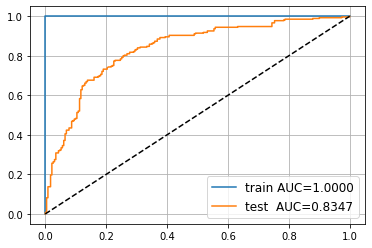

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Solving it better: word vectors

Let's try another approach: instead of counting per-word frequencies, we shall map all words to pre-trained word vectors and average over them to get text features.

This should give us two key advantages: (1) we now have 10^2 features instead of 10^4 and (2) our model can generalize to word that are not in training dataset.

We begin with a standard approach with pre-trained word vectors. However, you may also try
* training embeddings from scratch on relevant (unlabeled) data
* multiplying word vectors by inverse word frequency in dataset (like tf-idf).
* concatenating several embeddings
    * call `gensim.downloader.info()['models'].keys()` to get a list of available models
* clusterizing words by their word-vectors and try bag of cluster_ids

__Note:__ loading pre-trained model may take a while. It's a perfect opportunity to refill your cup of tea/coffee and grab some extra cookies. Or binge-watch some tv series if you're slow on internet connection

In [89]:
import gensim.downloader 
embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

# If you're low on RAM or download speed, use "glove-wiki-gigaword-100" instead. Ignore all further asserts.

In [94]:
features = np.zeros([100], dtype='float32')

In [95]:
len(embeddings['the'])

100

In [103]:
embeddings.add_vectors(['UNK'], [embeddings['the']], replace  = True)

IndexError: index 400000 is out of bounds for axis 0 with size 400000

In [ ]:
, replace  = True

In [98]:
def vectorize_sum(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')
    
#     <YOUR CODE>
    words = comment.split()
    for word in words:
        if word in embeddings.index_to_key:
            features += embeddings[word]
        else:
            features += embeddings['UNK']
            
    return features

assert np.allclose(
    vectorize_sum("who cares anymore . they attack with impunity .")[::70],
    np.array([0.0108616 ,  0.0261663 ,  0.13855131, -0.18510573, -0.46380025])
)

ValueError: operands could not be broadcast together with shapes (2,) (5,) 

In [99]:
vectorize_sum("who cares anymore . they attack with impunity .")[::70]

array([-1.00767   , -0.27343804], dtype=float32)

In [100]:
embeddings.has_index_for('UNK')

True

In [102]:
for text in texts_train:
    print(text)
    vectorize_sum(text)

... oh and what kind of person watches another persons mytalk page ? stalker !


IndexError: index 400000 is out of bounds for axis 0 with size 400000

In [61]:
[vectorize_sum(text) for text in texts_train]

IndexError: index 400000 is out of bounds for axis 0 with size 400000

In [59]:
X_train_wv = np.stack([vectorize_sum(text) for text in texts_train])
X_test_wv = np.stack([vectorize_sum(text) for text in texts_test])

IndexError: index 400000 is out of bounds for axis 0 with size 400000

In [44]:
texts_train

array(['... oh and what kind of person watches another persons mytalk page ? stalker !',
       '" comment " " but it\'s easier to be lazy and accuse an editor of ownership than to take the time to see what those edits are . " " but i suppose reading isn\'t your strong suit , is it ? please see the warning i left for you on your talk page ; admins are not above the rules at wikipedia . stop the personal attacks . i personally feel that the list of all 88 signatories does not detract from the article in any way ; properly cited , it simply names people who voluntarily rushed to judgment against these three white boys . it was their decision to get involved in this incident ; they should feel proud to be included here . cheers . | talk p . s . i also have felt ( for a long time ) that you\'ve attempted to gain \' ownership \' of every article concerning this hoax , as well as any article mentioning crystal gail mangum . | talk "',
       'henry lee lucas was my dad im pretty sure i know 

In [23]:
wv_model = LogisticRegression().fit(X_train_wv, y_train)

for name, X, y, model in [
    ('bow train', X_train_bow, y_train, bow_model),
    ('bow test ', X_test_bow, y_test, bow_model),
    ('vec train', X_train_wv, y_train, wv_model),
    ('vec test ', X_test_wv, y_test, wv_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

assert roc_auc_score(y_test, wv_model.predict_proba(X_test_wv)[:, 1]) > 0.92, "something's wrong with your features"

NameError: name 'X_train_wv' is not defined

If everything went right, you've just managed to reduce misclassification rate by a factor of two.
This trick is very useful when you're dealing with small datasets. However, if you have hundreds of thousands of samples, there's a whole different range of methods for that. We'll get there in the second part.